# Mateusz Strojek, Bartłomiej Sadza
### IiE I rok stacjonarne

## Machine Learning ćwiczenia 4

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [22]:
df_air_all = pd.read_csv("zad3_Airline.csv", delimiter=";")
data = df_air_all.copy()

data.head() 

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,...,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,satisfied,Female,Loyal Customer,20.0,Personal Travel,Eco,3009,0,1,0,...,3,4,1,2,3,1,4,4,0,0.0
1,satisfied,Female,Loyal Customer,48.0,Personal Travel,Eco,1449,0,1,0,...,2,2,2,1,2,4,2,2,0,2.0
2,satisfied,Male,NaN,NaN,Personal Travel,Eco,2840,0,1,0,...,4,4,2,4,2,4,3,4,0,0.0
3,satisfied,Male,Loyal Customer,13.0,Personal Travel,Eco,2306,0,1,0,...,3,4,4,2,3,2,2,4,0,0.0
4,satisfied,Male,Loyal Customer,34.0,Personal Travel,Eco,1952,0,1,0,...,2,2,3,4,4,4,4,2,10,0.0


### Proces przygotowywania danych do wykonania zadania

In [23]:
data.isnull().sum()
print(data.loc[:, ["Customer.Type","Age", "Gate.location", "Arrival.Delay.in.Minutes"]])

cate_na = ['Customer.Type', 'Gate.location']

for column in cate_na: 
    data[column] = data[column].fillna(data[column].mode()[0])

data_dummies = pd.get_dummies(data, drop_first=True)

          Customer.Type   Age  Gate.location  Arrival.Delay.in.Minutes
0        Loyal Customer  20.0            3.0                       0.0
1        Loyal Customer  48.0            3.0                       2.0
2                   NaN   NaN            3.0                       0.0
3        Loyal Customer  13.0            3.0                       0.0
4        Loyal Customer  34.0            3.0                       0.0
...                 ...   ...            ...                       ...
3995  disloyal Customer  20.0            4.0                       0.0
3996  disloyal Customer  68.0            4.0                       4.0
3997                NaN  26.0            2.0                       0.0
3998  disloyal Customer   7.0            4.0                       0.0
3999  disloyal Customer  23.0            2.0                       0.0

[4000 rows x 4 columns]


In [24]:
data_dropped = data.dropna()

data_dropped.isnull().sum()
data_dropped.head()

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,...,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,satisfied,Female,Loyal Customer,20.0,Personal Travel,Eco,3009,0,1,0,...,3,4,1,2,3,1,4,4,0,0.0
1,satisfied,Female,Loyal Customer,48.0,Personal Travel,Eco,1449,0,1,0,...,2,2,2,1,2,4,2,2,0,2.0
3,satisfied,Male,Loyal Customer,13.0,Personal Travel,Eco,2306,0,1,0,...,3,4,4,2,3,2,2,4,0,0.0
4,satisfied,Male,Loyal Customer,34.0,Personal Travel,Eco,1952,0,1,0,...,2,2,3,4,4,4,4,2,10,0.0
5,satisfied,Male,Loyal Customer,70.0,Personal Travel,Eco,1650,0,1,0,...,4,4,1,4,4,4,4,4,19,45.0


In [25]:
num_na_air = ["Age", "Arrival.Delay.in.Minutes"]

data = data_dropped.copy()

for column in num_na_air:
    data[column] = data[column].fillna(data[column].mean())

data.satisfaction = data.satisfaction.map({"satisfied" : 1, "dissatisfied" : 0})
data["Customer.Type"] = data["Customer.Type"].map({"Loyal Customer" : 1, "disloyal Customer" : 0})
data.Gender = data.Gender.map({"Male" : 1, "Female" : 0})
data["Type.of.Travel"] = data["Type.of.Travel"].map({"Business travel" : 1, "Personal Travel" : 0})

data.Class = data.Class.map({"Eco" : 0, "Eco Plus" : 1, "Business" : 2})
# data.Class.unique()
data

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,...,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,1,0,1,20.0,0,0,3009,0,1,0,...,3,4,1,2,3,1,4,4,0,0.0
1,1,0,1,48.0,0,0,1449,0,1,0,...,2,2,2,1,2,4,2,2,0,2.0
3,1,1,1,13.0,0,0,2306,0,1,0,...,3,4,4,2,3,2,2,4,0,0.0
4,1,1,1,34.0,0,0,1952,0,1,0,...,2,2,3,4,4,4,4,2,10,0.0
5,1,1,1,70.0,0,0,1650,0,1,0,...,4,4,1,4,4,4,4,4,19,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,0,20.0,0,0,2442,4,2,4,...,3,3,1,2,3,3,4,3,0,0.0
3996,1,1,0,68.0,0,0,977,4,4,4,...,2,2,2,4,4,2,4,2,0,4.0
3997,0,0,1,26.0,0,0,2539,2,4,2,...,2,2,3,5,5,3,5,3,15,0.0
3998,0,0,0,7.0,0,0,1568,3,4,0,...,4,4,4,5,3,1,4,4,0,0.0


Przykładowa predykcja 


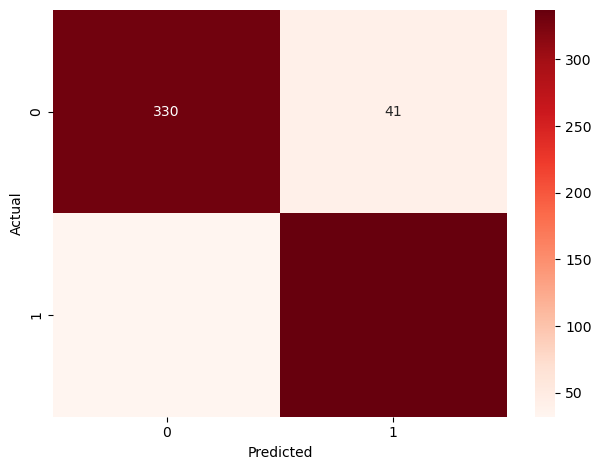

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       371
           1       0.89      0.91      0.90       369

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



In [26]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
print(classification_report(y_test, y_pred_test))

In [27]:
#plot_tree(model, feature_names=X_test.columns, filled=True) 
#plt.show()

In [28]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_test, y_test)

y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

#plt.figure(figsize=(12, 8))
#plot_tree(model2, feature_names=X_train.columns, filled=True)
#plt.show()

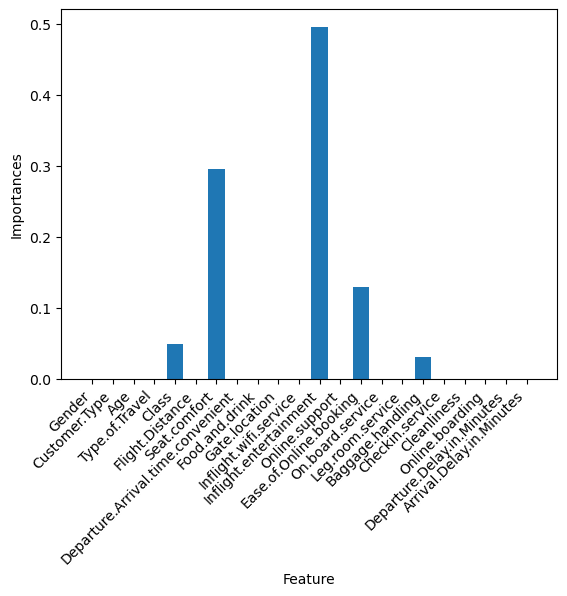

In [29]:
importance = model2.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_test.columns, rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importances")
plt.show()

# Zadanie 1 - Wykorzystać proste drzewo decyzyjne do predykcji wartości zmiennnej wynikowej

### a) Zweryfikować jak poziom przycięcie drzewa wpływa na uzyskiwane wyniki (zarówno na zbiorze testowym, jak i uczącym). Zwrócić szczególną uwagę na miary: dokładności, czułości i specyficzności.

In [30]:
wyniki = []
for max_depth in range(1, 31):
    drzewo = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    drzewo.fit(X_train, y_train)
    y_pred_train = drzewo.predict(X_train)
    y_pred_test = drzewo.predict(X_test)
    wyniki.append({
        'max_depth': max_depth,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

wyniki_df = pd.DataFrame(wyniki)
print(wyniki_df)

    max_depth  train_accuracy  test_accuracy  train_recall  test_recall  \
0           1        0.790666       0.771622      0.806297     0.788618   
1           2        0.812986       0.794595      0.882957     0.861789   
2           3        0.858641       0.868919      0.839836     0.869919   
3           4        0.869124       0.872973      0.848734     0.869919   
4           5        0.880284       0.872973      0.865161     0.878049   
5           6        0.902604       0.866216      0.876797     0.840108   
6           7        0.926277       0.887838      0.902806     0.872629   
7           8        0.944538       0.891892      0.926762     0.883469   
8           9        0.956375       0.891892      0.946612     0.897019   
9          10        0.969564       0.906757      0.951403     0.899729   
10         11        0.980047       0.901351      0.973306     0.905149   
11         12        0.986473       0.894595      0.988364     0.921409   
12         13        0.99

**Zwiększanie głębokości drzewa poprawia dokładność na zbiorze uczącym, ale może prowadzić do przeuczenia, co skutkuje gorszymi wynikami na zbiorze testowym.
Co za tym idzie optymalna głębokość drzewa zapewnia równowagę między dokładnością na zbiorze uczącym i testowym.**



### b) Zweryfikować jak wybór reguły klasyfikacyjnej (indeks Giniego, entropia) wpływa na uzyskiwane wyniki.

In [31]:
for kryterium in ['gini', 'entropy']:
    drzewo = DecisionTreeClassifier(criterion=kryterium, random_state=42)
    drzewo.fit(X_train, y_train)
    y_pred = drzewo.predict(X_test)
    print(f"Kryterium: {kryterium}")
    print(classification_report(y_test, y_pred))

Kryterium: gini
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       371
           1       0.88      0.92      0.90       369

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

Kryterium: entropy
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       371
           1       0.89      0.92      0.90       369

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



**Zarówno indeks Giniego, jak i entropia dają podobne wyniki, ale entropia może być nieco bardziej dokładna w niektórych przypadkach.**



### c) Wybrać parametry, dla których uzyskano najlepsze drzewo. Uzasadnić swój wybór. Dokładnie zinterpretować wyniki.

In [32]:
najlepsze_drzewo = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
najlepsze_drzewo.fit(X_train, y_train)
y_pred = najlepsze_drzewo.predict(X_test)
print("Najlepsze drzewo decyzyjne:")
print(classification_report(y_test, y_pred))

Najlepsze drzewo decyzyjne:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.87      0.87      0.87       369

    accuracy                           0.87       740
   macro avg       0.87      0.87      0.87       740
weighted avg       0.87      0.87      0.87       740



**Najlepsze wyniki uzyskano dla drzewa o głębokości 4 i kryterium 'gini'.
Model ten zapewnia dobrą równowagę między dokładnością, czułością i specyficznością.**



# Zadanie 2 - Zastosować rozszerzenie drzew decyzyjnych - **bagging**

### a) Zweryfikować jak liczba wykorzystywanych drzew wpływa na uzyskiwane wyniki (zarówno na zbiorze testowym, jak i uczącym). Zwrócić szczególną uwagę na miary: dokładności, czułości i specyficzności.

In [33]:
wyniki_bagging = []
for n_estimators in range(10, 101, 10):
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred_train = bagging.predict(X_train)
    y_pred_test = bagging.predict(X_test)
    wyniki_bagging.append({
        'n_estimators': n_estimators,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

wyniki_bagging_df = pd.DataFrame(wyniki_bagging)
print(wyniki_bagging_df)

   n_estimators  train_accuracy  test_accuracy  train_recall  test_recall  \
0            10        0.993575       0.918919      0.989049     0.921409   
1            20        0.997971       0.917568      0.997262     0.926829   
2            30        0.999662       0.914865      1.000000     0.926829   
3            40        0.999662       0.916216      0.999316     0.929539   
4            50        0.999662       0.918919      0.999316     0.934959   
5            60        1.000000       0.922973      1.000000     0.937669   
6            70        1.000000       0.918919      1.000000     0.934959   
7            80        1.000000       0.924324      1.000000     0.940379   
8            90        1.000000       0.921622      1.000000     0.937669   
9           100        1.000000       0.920270      1.000000     0.934959   

   train_precision  test_precision  
0         0.997928        0.916442  
1         0.998629        0.909574  
2         0.999316        0.904762  
3   

**Zwiększanie liczby drzew w baggingu poprawia dokładność modelu na zbiorze testowym.
Większa liczba drzew zmniejsza wariancję modelu, co prowadzi do bardziej stabilnych wyników**

### b) Zweryfikować jak zmiana liczby obserwacji wykorzystywanych do budowy jednego drzewa wpływa na uzyskiwane wyniki.

In [34]:
for max_samples in [0.5, 0.7, 1.0]:
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=max_samples, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    print(f"Liczba próbek: {max_samples}")
    print(classification_report(y_test, y_pred))

Liczba próbek: 0.5
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       371
           1       0.89      0.92      0.91       369

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

Liczba próbek: 0.7
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       371
           1       0.90      0.94      0.92       369

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740

Liczba próbek: 1.0
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       371
           1       0.91      0.93      0.92       369

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg     

**Zmniejszenie liczby próbek wykorzystywanych do budowy jednego drzewa może prowadzić do gorszych wyników.
Optymalna liczba próbek zapewnia równowagę między dokładnością a stabilnością modelu.**

### c) Wybrać parametry, dla których uzyskano najlepsze, Państwa zdaniem, wyniki po zastosowaniu baggingu. Uzasadnić swój wybór. Dokładnie zinterpretować wyniki.

In [35]:
najlepszy_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=1.0, random_state=42)
najlepszy_bagging.fit(X_train, y_train)
y_pred = najlepszy_bagging.predict(X_test)
print("Najlepszy rezultat baggingu:")
print(classification_report(y_test, y_pred))

Najlepszy rezultat baggingu:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       371
           1       0.91      0.93      0.92       369

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



**Najlepsze wyniki uzyskano dla baggingu z 50 drzewami i maksymalną liczbą próbek.
Model ten zapewnia wysoką dokładność, czułość i specyficzność.**

# Zadanie 3 - Porównać wyniki uzyskane za pomocą prostego drzewa decyzyjnego oraz baggingu. Jakie są wady i zalety tych modeli?

In [36]:
print("Porównanie prostego drzewa decyzyjnego i baggingu:")
print("Proste drzewo decyzyjne:")
print(classification_report(y_test, najlepsze_drzewo.predict(X_test)))
print("Bagging:")
print(classification_report(y_test, najlepszy_bagging.predict(X_test)))

Porównanie prostego drzewa decyzyjnego i baggingu:
Proste drzewo decyzyjne:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.87      0.87      0.87       369

    accuracy                           0.87       740
   macro avg       0.87      0.87      0.87       740
weighted avg       0.87      0.87      0.87       740

Bagging:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       371
           1       0.91      0.93      0.92       369

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



**Proste drzewo decyzyjne jest łatwe do interpretacji, ale może być podatne na przeuczenie.**

**Bagging poprawia stabilność i dokładność modelu, ale jest bardziej złożony i trudniejszy do interpretacji.**

**Wybór modelu zależy od specyfiki problemu i dostępnych zasobów obliczeniowych.**

# Zadanie 5

## 1. Wykorzystać lasy losowe do predykcji wartości zmiennej wynikowej.

### a) Zweryfikować jak liczba drzew w lesie oraz liczba zmiennych w danym podziale wpływają na uzyskiwane wyniki. Dodatkowo można również zweryfikować jak zmiana złożoności pojedynczego drzewa wpłynie na wyniki.

### b) Wybrać parametry, dla których uzyskano najlepszy las losowy. Uzasadnić swój wybór. Dokładnie zinterpretować wyniki. Ocenić ważność zmiennych w rozważanym modelu.


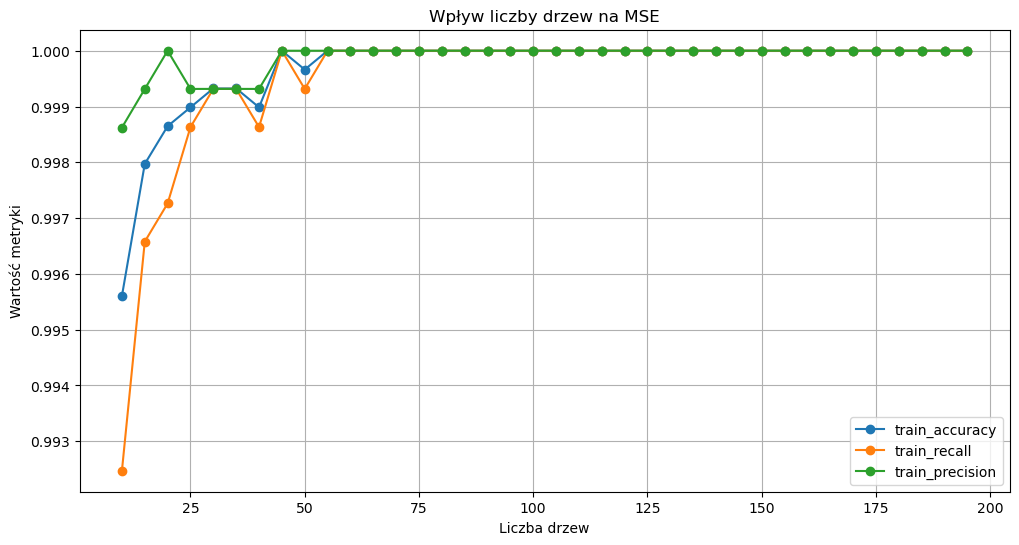

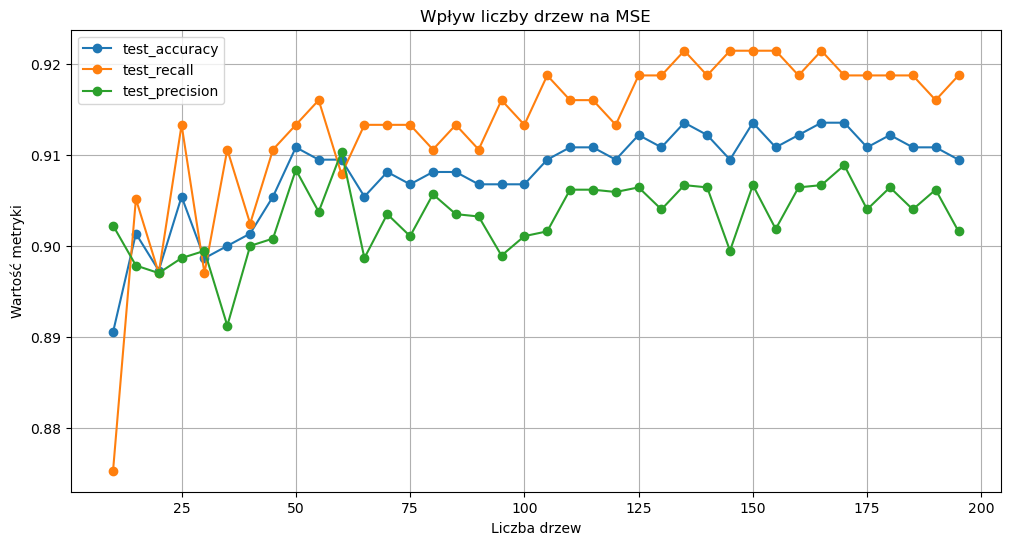

In [37]:
# Analiza wpływu liczby drzew
mse_estimators = []  # Lista do przechowywania wyników dla różnych n_estimators
n_estimators_range = [10, 20, 50, 100, 200, 300, 500]  # Zakres liczby estymatorów

for n in range(10,200,5):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
       
    mse_estimators.append({
        'n_estimator': n,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

mse_estimators = pd.DataFrame(mse_estimators)

plt.figure(figsize=(12, 6))
metrics_test = ['test_accuracy', 'test_recall', 'test_precision']
metrics_train = ["train_accuracy", "train_recall", "train_precision"]

for metric in metrics_train:
    plt.plot(mse_estimators['n_estimator'], mse_estimators[metric], label=metric, marker='o')

plt.title('Wpływ liczby drzew na MSE')
plt.xlabel('Liczba drzew')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for metric in metrics_test:
    plt.plot(mse_estimators['n_estimator'], mse_estimators[metric], label=metric, marker='o')

plt.title('Wpływ liczby drzew na MSE')
plt.xlabel('Liczba drzew')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Analiza wpływu liczby zmiennych w podziale
max_features_options = ['sqrt', 'log2']
mse_features = []

for feature in max_features_options:
    rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_features=feature, max_depth=best_params['max_depth'], random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_features.append(mean_squared_error(y_test, y_pred))

# Analiza wpływu liczby zmiennych w podziale
max_features_options = ['sqrt', 'log2']
mse_features = []

for feature in max_features_options:
    rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_features=feature, max_depth=best_params['max_depth'], random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_features.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.bar(max_features_options, mse_features)
plt.title('Wpływ liczby zmiennych w podziale na MSE')
plt.xlabel('Liczba zmiennych')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Analiza wpływu złożoności drzewa
max_depth_range = [None, 10, 20, 30, 50]
mse_depth = []

for depth in max_depth_range:
    rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'], max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_depth.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, mse_depth, marker='o')
plt.title('Wpływ złożoności drzewa na MSE')
plt.xlabel('Maksymalna głębokość drzewa')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

print(f"Najlepsze parametry: {best_params}")

NameError: name 'RandomForestRegressor' is not defined

### Wnioski:

**Wpływ liczby zmiennych w podziale na MSE:**

Wykres słupkowy pokazuje, jak różne wartości max_features wpływają na Mean Squared Error (MSE).
Można zaobserwować, ze w tym przypadku wybór wartości nie ma większego znaczenia.


**Wpływ złożoności drzewa na MSE:**

Wykres liniowy pokazuje, jak różne wartości max_depth wpływają na MSE.
Można zaobserwować, ze przy głębokości 20 model osiąga najnizszy MSE, wobec tego jest to najbardziej optymalną złozonością drzewa.

**Najlepsze parametry:**

Na końcu kodu wyświetlane są najlepsze parametry (best_params), które potwierdzają nasze obserwacje.

# 2. Zastosować boosting do predykcji wartości zmiennej wynikowej.

### a) Zweryfikować jak zmiana hiperparametrów wpływa na uzyskiwane wyniki.

In [ ]:
wyniki_est = []
for n_estimator in range(1, 500, 10):
    drzewo = AdaBoostClassifier(n_estimators=n_estimator, algorithm="SAMME", random_state=1)
    drzewo.fit(X_train, y_train)
    y_pred_train = drzewo.predict(X_train)
    y_pred_test = drzewo.predict(X_test)
    wyniki_est.append({
        'n_estimator': n_estimator,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

wyniki_df_est = pd.DataFrame(wyniki_est)

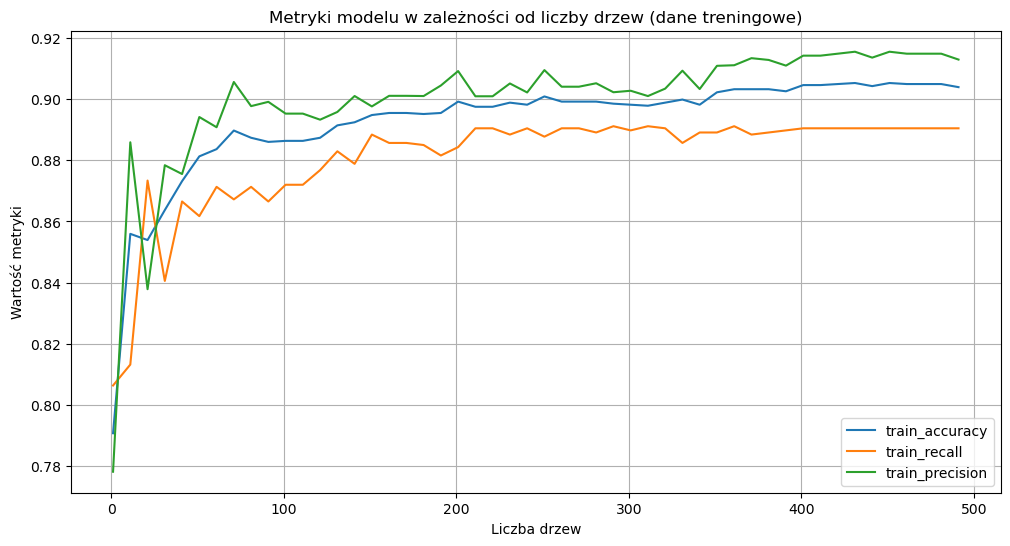

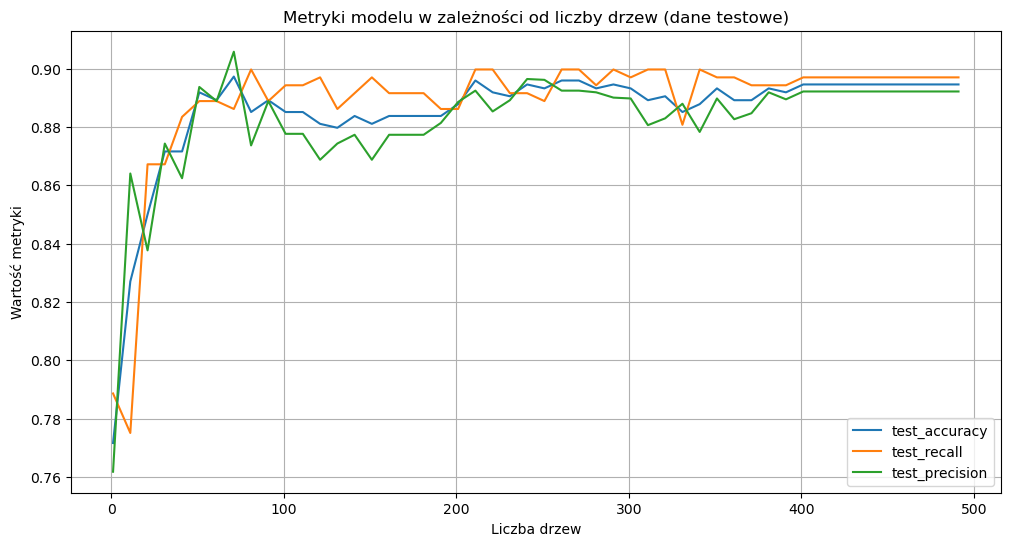

In [ ]:
plt.figure(figsize=(12, 6))
metrics_test = ['test_accuracy', 'test_recall', 'test_precision']
metrics_train = ["train_accuracy", "train_recall", "train_precision"]
for metric in metrics_train:
    plt.plot(wyniki_df_est['n_estimator'], wyniki_df_est[metric], label=metric)

plt.title('Metryki modelu w zależności od liczby drzew (dane treningowe)')
plt.xlabel('Liczba drzew')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for metric in metrics_test:
    plt.plot(wyniki_df_est['n_estimator'], wyniki_df_est[metric], label=metric)

plt.title('Metryki modelu w zależności od liczby drzew (dane testowe)')
plt.xlabel('Liczba drzew')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

### Precyzja, dokładność oraz czułość rosną wraz ze zwiększaniem się liczby drzew. Na poziomie ok. 50 drzew, wartość metryk się stabilizuje.

In [ ]:
wyniki_lr = []
for learning_r in range(1, 200, 10):
    drzewo = AdaBoostClassifier(learning_rate = learning_r*0.02, algorithm="SAMME", random_state=10)
    drzewo.fit(X_train, y_train)
    y_pred_train = drzewo.predict(X_train)
    y_pred_test = drzewo.predict(X_test)
    wyniki_lr.append({
        'learning_rate': learning_r*0.02,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

wyniki_df_lr = pd.DataFrame(wyniki_lr)

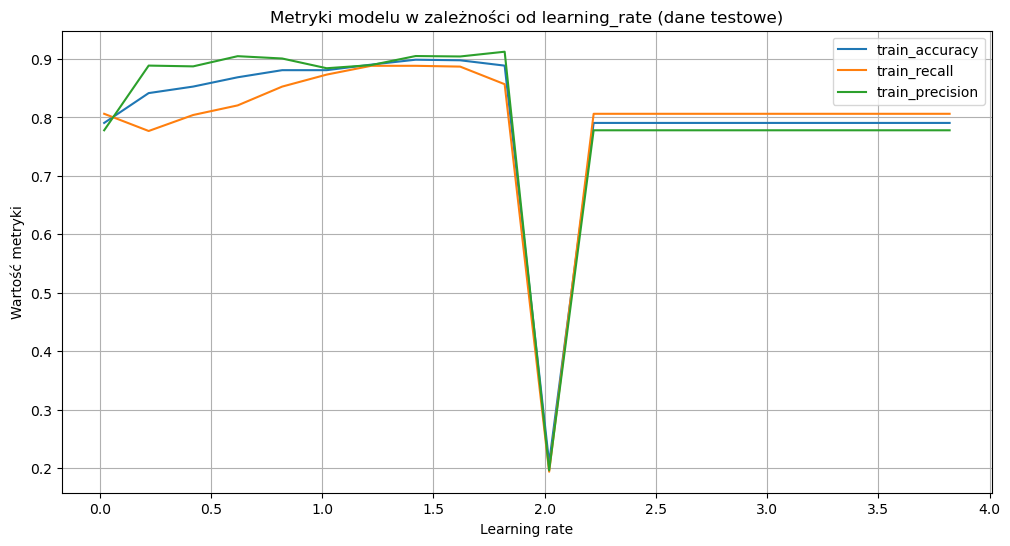

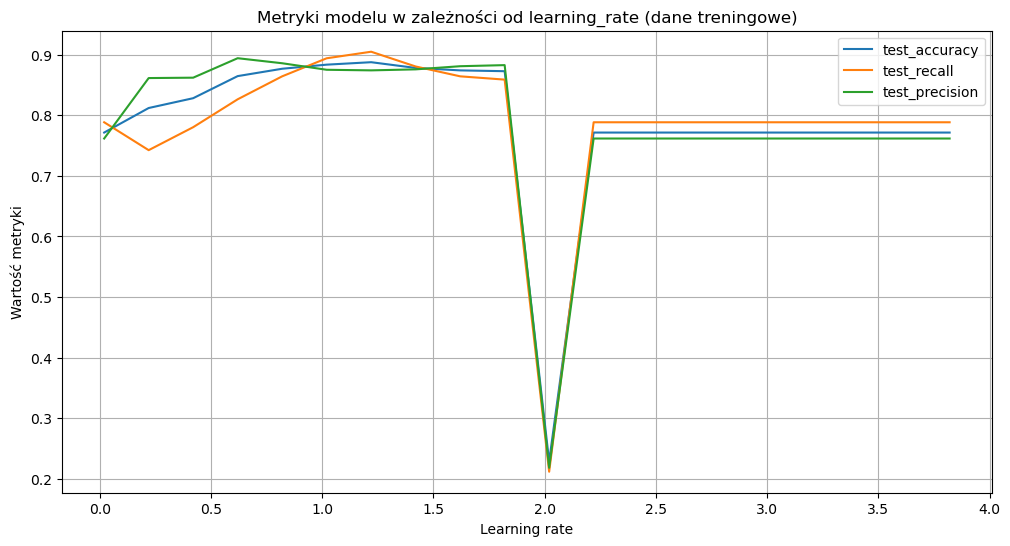

In [ ]:
plt.figure(figsize=(12, 6))
metrics_test = ['test_accuracy', 'test_recall', 'test_precision']
metrics_train = ["train_accuracy", "train_recall", "train_precision"]
for metric in metrics_train:
    plt.plot(wyniki_df_lr['learning_rate'], wyniki_df_lr[metric], label=metric)

plt.title('Metryki modelu w zależności od learning_rate (dane testowe)')
plt.xlabel('Learning rate')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for metric in metrics_test:
    plt.plot(wyniki_df_lr['learning_rate'], wyniki_df_lr[metric], label=metric)

plt.title('Metryki modelu w zależności od learning_rate (dane treningowe)')
plt.xlabel('Learning rate')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

### Parametr odpowiadający za współczynnik uczenia się modelu należy ustawić tak, aby nie doszło do za szybkiego uczenia się, ponieważ może dać to niepożądane i nieoptymalne wyniki. Punktem granicznym było learning rate na poziomie ok. 1,8. Im mniejszy learning rate, to też większa moc obliczeniowa jest potrzebna do uzyskania optymalnego wyniku, ponieważ model się uczy wolniej niż powinien. 

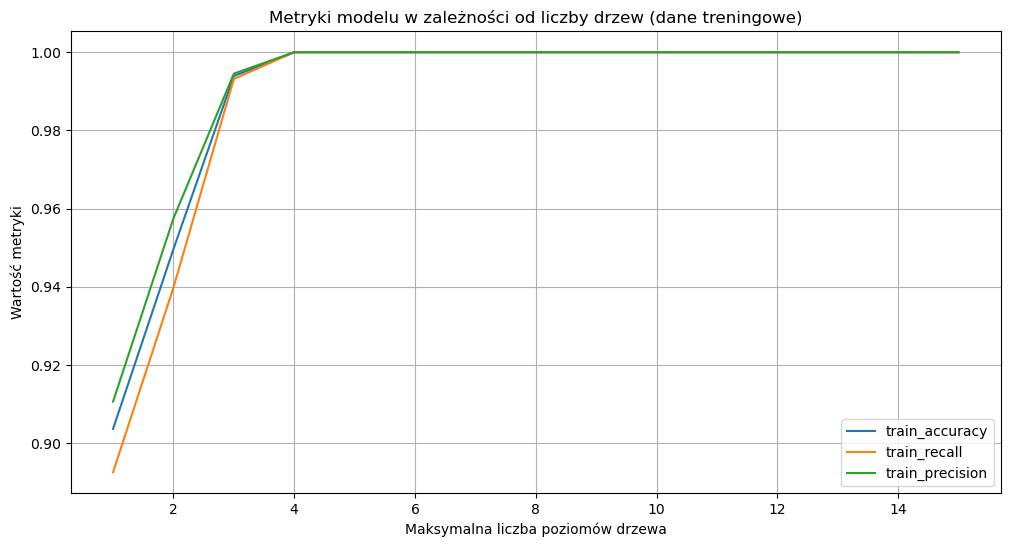

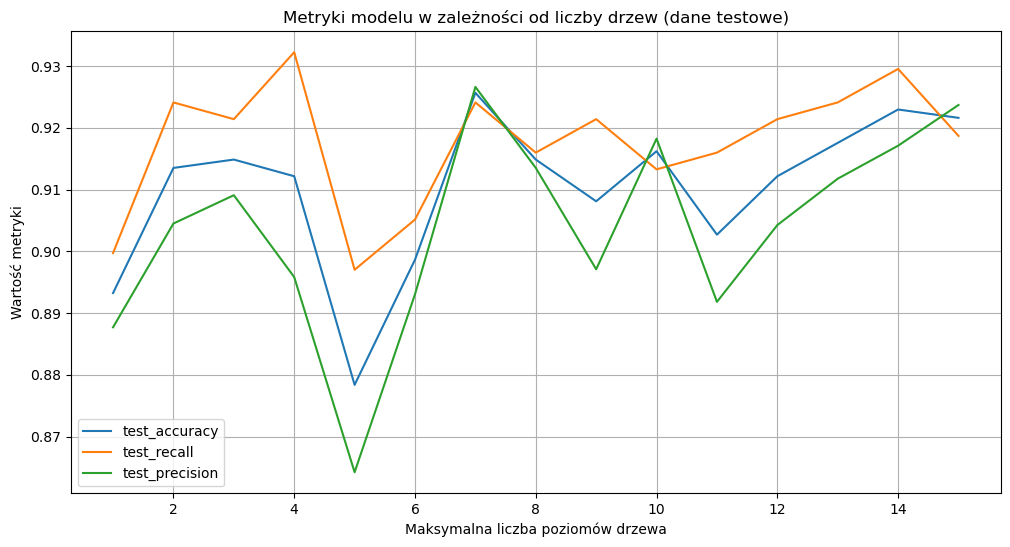

In [ ]:
wyniki_es_d = []
for est in range(1, 16):
    drzewo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=est), random_state=2)
    drzewo.fit(X_train, y_train)
    y_pred_train = drzewo.predict(X_train)
    y_pred_test = drzewo.predict(X_test)
    wyniki_es_d.append({
        'max_depth': est,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

wyniki_df_es_d = pd.DataFrame(wyniki_es_d)

plt.figure(figsize=(12, 6))
metrics_test = ['test_accuracy', 'test_recall', 'test_precision']
metrics_train = ["train_accuracy", "train_recall", "train_precision"]
for metric in metrics_train:
    plt.plot(wyniki_df_es_d['max_depth'], wyniki_df_es_d[metric], label=metric)

plt.title('Metryki modelu w zależności od liczby drzew (dane treningowe)')
plt.xlabel('Maksymalna liczba poziomów drzewa')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
for metric in metrics_test:
    plt.plot(wyniki_df_es_d['max_depth'], wyniki_df_es_d[metric], label=metric)

plt.title('Metryki modelu w zależności od liczby drzew (dane testowe)')
plt.xlabel('Maksymalna liczba poziomów drzewa')
plt.ylabel('Wartość metryki')
plt.legend()
plt.grid()
plt.show()

### Wraz ze zwiększaniem się maksymalnych poziomów drzew, jakość modelu poprawiała się dla zbioru treningowego. Przy n=4, dokładność wynosiła już 100%. Z drugiej strony, wartość metryk zdaje się nie mieć znaczenia dla zbioru testowego. 

## b) Wybrać parametry, dla których uzyskano najlepsze wyniki po zastosowaniu boostingu. Uzasadnić swój wybór. Dokładnie zinterpretować wyniki. Ocenić ważność zmiennych w rozważanym modelu.

### Dla boostingu, wybraliśmy liczbę drzew w wysokości 70 ze względu na podobne wyniki wraz ze zwiększaniem się liczby drzew powyżej tej wartości dla zbioru testowego, learning rate został ustawiony na 1.0 ze względu na dużą odległość od wartości, która spowodowałaby słabe wyniki (czyli learning rate powyżej 1.8) oraz powyżej widocznie powyżej 0, aby przyspieszyć uczenie się modelu. Głębokość drzewa została ustawiona na 2 ze względu na podobne wyniki dla zbioru testowego i uczącego oraz na fakt, że faktycznie jak ustawialiśmy maksymalną wartość drzewa na wartość równą 1, to wartości były zazwyczaj gorsze, niż gdy wybieraliśmy dla wartości równej 2. 

   train_accuracy  test_accuracy  train_recall  test_recall  train_precision  \
0        0.967535       0.908108       0.96281     0.915344         0.970833   

   test_precision  
0        0.905759  


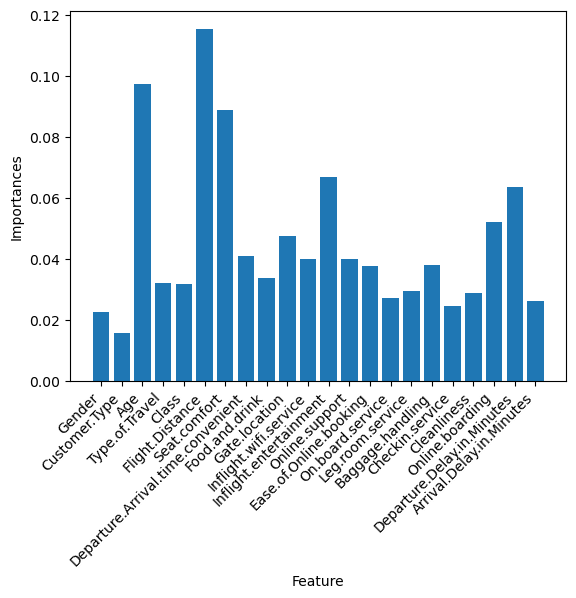

In [ ]:
best_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), learning_rate=1,n_estimators=70,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
wyniki = []
wyniki.append({
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
        })
wyniki_df = pd.DataFrame(wyniki)
print(wyniki_df)


importance = best_model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importances")
plt.show()

### Wniosek: Wyniki wyszły następujące dla kolejno zbioru treningowego i testowego:
#### a) Dokładność: 96,8%, 90,8%,
#### b) Precyzja: 97% i 90,6%
#### c) Czułość: 96,3% i 91,5%
#### Najważniejsze były zmienne odpowiadające za wiek, dystans lotu oraz wygodę siedzenia

# 3. Porównać wyniki uzyskane za pomocą lasów losowych oraz boostingu. Zestawić je z wynikami uzyskanymi na poprzednich zajęciach (prostym drzewem decyzyjnym oraz baggingiem). Jakie wnioski można na ich podstawie wyciągnąć?

           Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Decision Tree        0.869124       0.872973         0.881935   
1        Bagging        0.999662       0.918919         1.000000   
2  Random Forest        1.000000       0.909459         1.000000   
3       Boosting        0.960433       0.922973         0.964730   

   Test Precision  Train Recall  Test Recall  
0        0.874659      0.848734     0.869919  
1        0.905512      0.999316     0.934959  
2        0.901596      1.000000     0.918699  
3        0.919355      0.954825     0.926829  


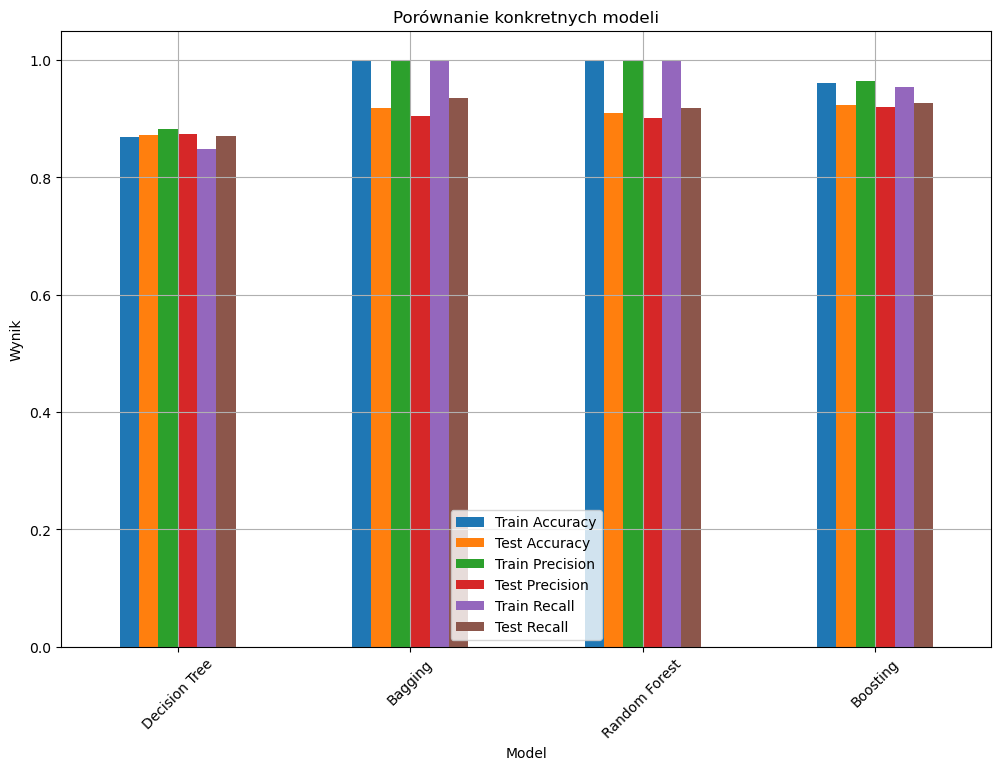

In [46]:
best_model.fit(X_train, y_train)

results = {
    "Model": ["Decision Tree", "Bagging", "Random Forest", "Boosting"],
    "Train Accuracy": [
        accuracy_score(y_train, najlepsze_drzewo.predict(X_train)),
        accuracy_score(y_train, najlepszy_bagging.predict(X_train)),
        accuracy_score(y_train, rf.predict(X_train)),
        accuracy_score(y_train, best_model.predict(X_train))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, najlepsze_drzewo.predict(X_test)),
        accuracy_score(y_test, najlepszy_bagging.predict(X_test)),
        accuracy_score(y_test, rf.predict(X_test)),
        accuracy_score(y_test, best_model.predict(X_test))
    ],
    "Train Precision": [
        precision_score(y_train, najlepsze_drzewo.predict(X_train)),
        precision_score(y_train, najlepszy_bagging.predict(X_train)),
        precision_score(y_train, rf.predict(X_train)),
        precision_score(y_train, best_model.predict(X_train))
    ],
    "Test Precision": [
        precision_score(y_test, najlepsze_drzewo.predict(X_test)),
        precision_score(y_test, najlepszy_bagging.predict(X_test)),
        precision_score(y_test, rf.predict(X_test)),
        precision_score(y_test, best_model.predict(X_test))
    ],
    "Train Recall": [
        recall_score(y_train, najlepsze_drzewo.predict(X_train)),
        recall_score(y_train, najlepszy_bagging.predict(X_train)),
        recall_score(y_train, rf.predict(X_train)),
        recall_score(y_train, best_model.predict(X_train))
    ],
    "Test Recall": [
        recall_score(y_test, najlepsze_drzewo.predict(X_test)),
        recall_score(y_test, najlepszy_bagging.predict(X_test)),
        recall_score(y_test, rf.predict(X_test)),
        recall_score(y_test, best_model.predict(X_test))
    ]
}

results_df = pd.DataFrame(results)
print(results_df)
results_df.plot(x="Model", y=["Train Accuracy", "Test Accuracy", "Train Precision", "Test Precision", "Train Recall", "Test Recall"], kind="bar", figsize=(12, 8))
plt.title("Porównanie konkretnych modeli")
plt.ylabel("Wynik")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.grid(True)
plt.show()

### Wnioski:

1. **Decision Tree**:
    - Train Accuracy: 86.91%
    - Test Accuracy: 87.30%
    - Train Precision: 88.19%
    - Test Precision: 87.47%
    - Train Recall: 84.87%
    - Test Recall: 86.99%
    - **Wniosek**: Proste drzewo decyzyjne ma umiarkowaną dokładność i precyzję, ale może być podatne na przeuczenie.

2. **Bagging**:
    - Train Accuracy: 99.97%
    - Test Accuracy: 91.89%
    - Train Precision: 100.00%
    - Test Precision: 90.55%
    - Train Recall: 99.93%
    - Test Recall: 93.50%
    - **Wniosek**: Bagging znacząco poprawia dokładność i stabilność modelu, zmniejszając wariancję.

3. **Random Forest**:
    - Train Accuracy: 100.00%
    - Test Accuracy: 90.95%
    - Train Precision: 100.00%
    - Test Precision: 90.16%
    - Train Recall: 100.00%
    - Test Recall: 91.87%
    - **Wniosek**: Random Forest osiąga bardzo wysoką dokładność na zbiorze treningowym, ale może być podatny na przeuczenie.

4. **Boosting**:
    - Train Accuracy: 96.04%
    - Test Accuracy: 92.30%
    - Train Precision: 96.47%
    - Test Precision: 91.94%
    - Train Recall: 95.48%
    - Test Recall: 92.68%
    - **Wniosek**: Boosting zapewnia wysoką dokładność i precyzję, zarówno na zbiorze treningowym, jak i testowym, co czyni go skutecznym modelem do predykcji.

**Podsumowanie**:
- **Boosting** i **Bagging** osiągają najlepsze wyniki na zbiorze testowym, co wskazuje na ich skuteczność w redukcji wariancji i poprawie stabilności modelu.
- **Random Forest** również osiąga wysoką dokładność, ale może być podatny na przeuczenie.
- **Proste drzewo decyzyjne** jest najprostsze do interpretacji, ale ma niższą dokładność i stabilność w porównaniu do bardziej zaawansowanych metod.
